In [1]:
cd /Users/dcox/Dropbox/InsightFellowship/Glimpse/

/Users/dcox/Dropbox/InsightFellowship/Glimpse


# Baseline models for Glimpse K12. 

In [2]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns

# Baseline models for dfs with continuous outcome variables = linear regression. 

### Read in the data

In [3]:
most_obs = pd.read_csv('most_obs_cont.csv')
most_feats = pd.read_csv('most_feats_cont.csv')

### Set up dfs for predictor and outcome variables 

In [4]:
mostObs_MathOutc = most_obs['ScantronMathPostTest']
mostObs_ReadOutc = most_obs['ScantronReadingPostTest']
mostObs_pred = most_obs.drop(['ScantronMathPostTest', 'ScantronReadingPostTest'], axis=1)
mostFeats_MathOutc = most_feats['ScantronMathPostTest']
mostFeats_ReadOutc = most_feats['ScantronReadingPostTest']
mostFeats_pred = most_feats.drop(['ScantronMathPostTest', 'ScantronReadingPostTest'], axis=1)

### Recode categorical strings with number labels and save those dictionaries

In [5]:
# Most observations df
mostObs_predCols = list(mostObs_pred)
mostObs_predCodes = []
for i in mostObs_predCols:
    mostObs_pred[i] = mostObs_pred[i].astype('category')
    d = dict(enumerate(mostObs_pred[i].cat.categories))
    mostObs_predCodes.append(d)
    mostObs_pred[i] = mostObs_pred[i].astype('category')
    mostObs_pred[i] = mostObs_pred[i].cat.codes

# Most features df
mostFeats_predCols = list(mostFeats_pred)
mostFeats_predCodes = []
for i in mostFeats_predCols:
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    d = dict(enumerate(mostFeats_pred[i].cat.categories))
    mostFeats_predCodes.append(d)
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    mostFeats_pred[i] = mostFeats_pred[i].cat.codes

### Based on the residual from the baseline models, used Kmeans clustering to add a feature and see if that pre-sortment improves the baseline models. 

In [6]:
from sklearn.cluster import KMeans
kmeans_mo = KMeans(n_clusters=2, random_state=649).fit(mostObs_pred)
kmeans_mf = KMeans(n_clusters=2, random_state=649).fit(mostFeats_pred)

In [7]:
# Append cols to dfs. 
mostObs_pred['kMeans'] = kmeans_mo.labels_
mostFeats_pred['kmeans'] = kmeans_mf.labels_

### Packages, functions, and algorithms. 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

### Predicting outcomes for using the 'most observations' df. 

Mean Absolute Error: 1114.7450198235235
Mean Squared Error: 1455025.512216224
Root Mean Squared Error: 1206.244383288985
R^2 Math:, 0.12948569194160986


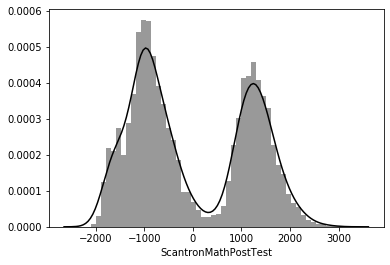

In [9]:
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_MathOutc, test_size=0.20, random_state = 649)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Math:,', r2_score(y_test, y_pred))
residuals = y_test - y_pred
sns.distplot(residuals, bins=50, color='black')

Mean Absolute Error: 1193.6731939739775
Mean Squared Error: 1696795.6522822916
Root Mean Squared Error: 1302.611090188584
R^2 Reading:, 0.12333118892647976


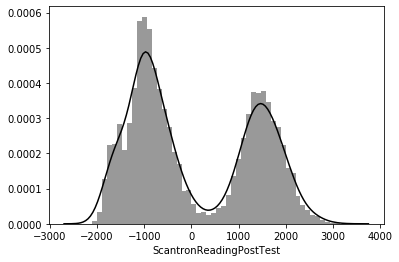

In [10]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_ReadOutc, test_size=0.20, random_state = 649)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Reading:,', r2_score(y_test, y_pred))
residuals = y_test - y_pred
sns.distplot(residuals, bins=50, color='black')

### Predicting outcomes for using the 'most features' df. 

Mean Absolute Error: 118.78684033107822
Mean Squared Error: 98612.54721448585
Root Mean Squared Error: 314.0263479622146
R^2 Math:, 0.3229989066531175


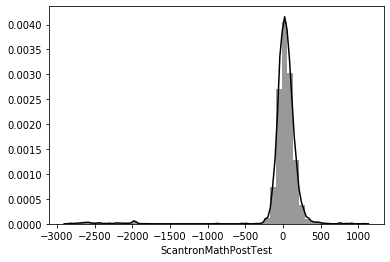

In [11]:
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Math:,', r2_score(y_test, y_pred))
residuals = y_test - y_pred
sns.distplot(residuals, bins=50, color='black')

Mean Absolute Error: 206.9937530189295
Mean Squared Error: 192530.2368452808
Root Mean Squared Error: 438.78267609977587
R^2 Reading:, 0.4257221978037906


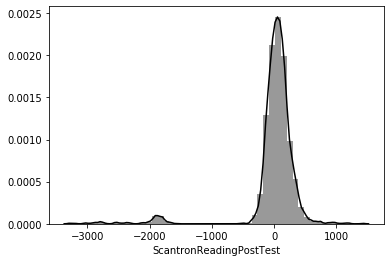

In [10]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 Reading:,', r2_score(y_test, y_pred))
residuals = y_test - y_pred
sns.distplot(residuals, bins=50, color='black')

# Baseline models for dfs with binary outcome variables = logistics regression. 

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [8]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

### Predicting outcomes for the 'most observations ' df. 

In [ ]:
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_MathOutc, test_size=0.20, random_state = 649)
regressor = LogisticRegression(solver='liblinear')
regressor.fit(X_train, y_train)
# Math metrics
y_pred = regressor.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))  
print('Precision:', metrics.precision_score(y_test, y_pred))  
print('Recall:', recall_score(y_test, y_pred))
print('ROC_AUC:,', roc_auc_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
plot_cm(y_test, y_pred)

/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [19]:
# Read outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostObs_pred, mostObs_ReadOutc, test_size=0.20, random_state = 649)
regressor = LogisticRegression(solver='liblinear')
regressor.fit(X_train, y_train)
# Read metrics
y_pred = regressor.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))  
print('Precision:', metrics.precision_score(y_test, y_pred))  
print('Recall:', recall_score(y_test, y_pred))
print('ROC_AUC:,', roc_auc_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

Accuracy: 0.7644991212653779
Precision: 0.7752388087656864
Recall: 0.9672820752512269
ROC_AUC:, 0.5584107045285192
F1: 0.8606778956123934


## Predicting outcomes for the 'most features' df. 

In [20]:
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
regressor = LogisticRegression(solver='liblinear')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))  
print('Precision:', metrics.precision_score(y_test, y_pred))  
print('Recall:', recall_score(y_test, y_pred))
print('ROC_AUC:,', roc_auc_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

Accuracy: 0.7794561933534743
Precision: 0.8565346956151554
Recall: 0.6899862825788752
ROC_AUC:, 0.7828389546424439
F1: 0.764292497625831


In [22]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
regressor = LogisticRegression(solver='liblinear')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))  
print('Precision:', metrics.precision_score(y_test, y_pred))  
print('Recall:', recall_score(y_test, y_pred))
print('ROC_AUC:,', roc_auc_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

Accuracy: 0.771636751377288
Precision: 0.7722949937197201
Recall: 0.9962962962962963
ROC_AUC:, 0.5126852560287909
F1: 0.8701101789143839
